In [4]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
data = np.load('data/data.npy')
label = np.load('data/label.npy')
data.shape, label.shape

((1510, 612, 460, 3), (1510, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42, shuffle=True)

In [7]:
X_train.shape, X_test.shape

((1057, 612, 460, 3), (453, 612, 460, 3))

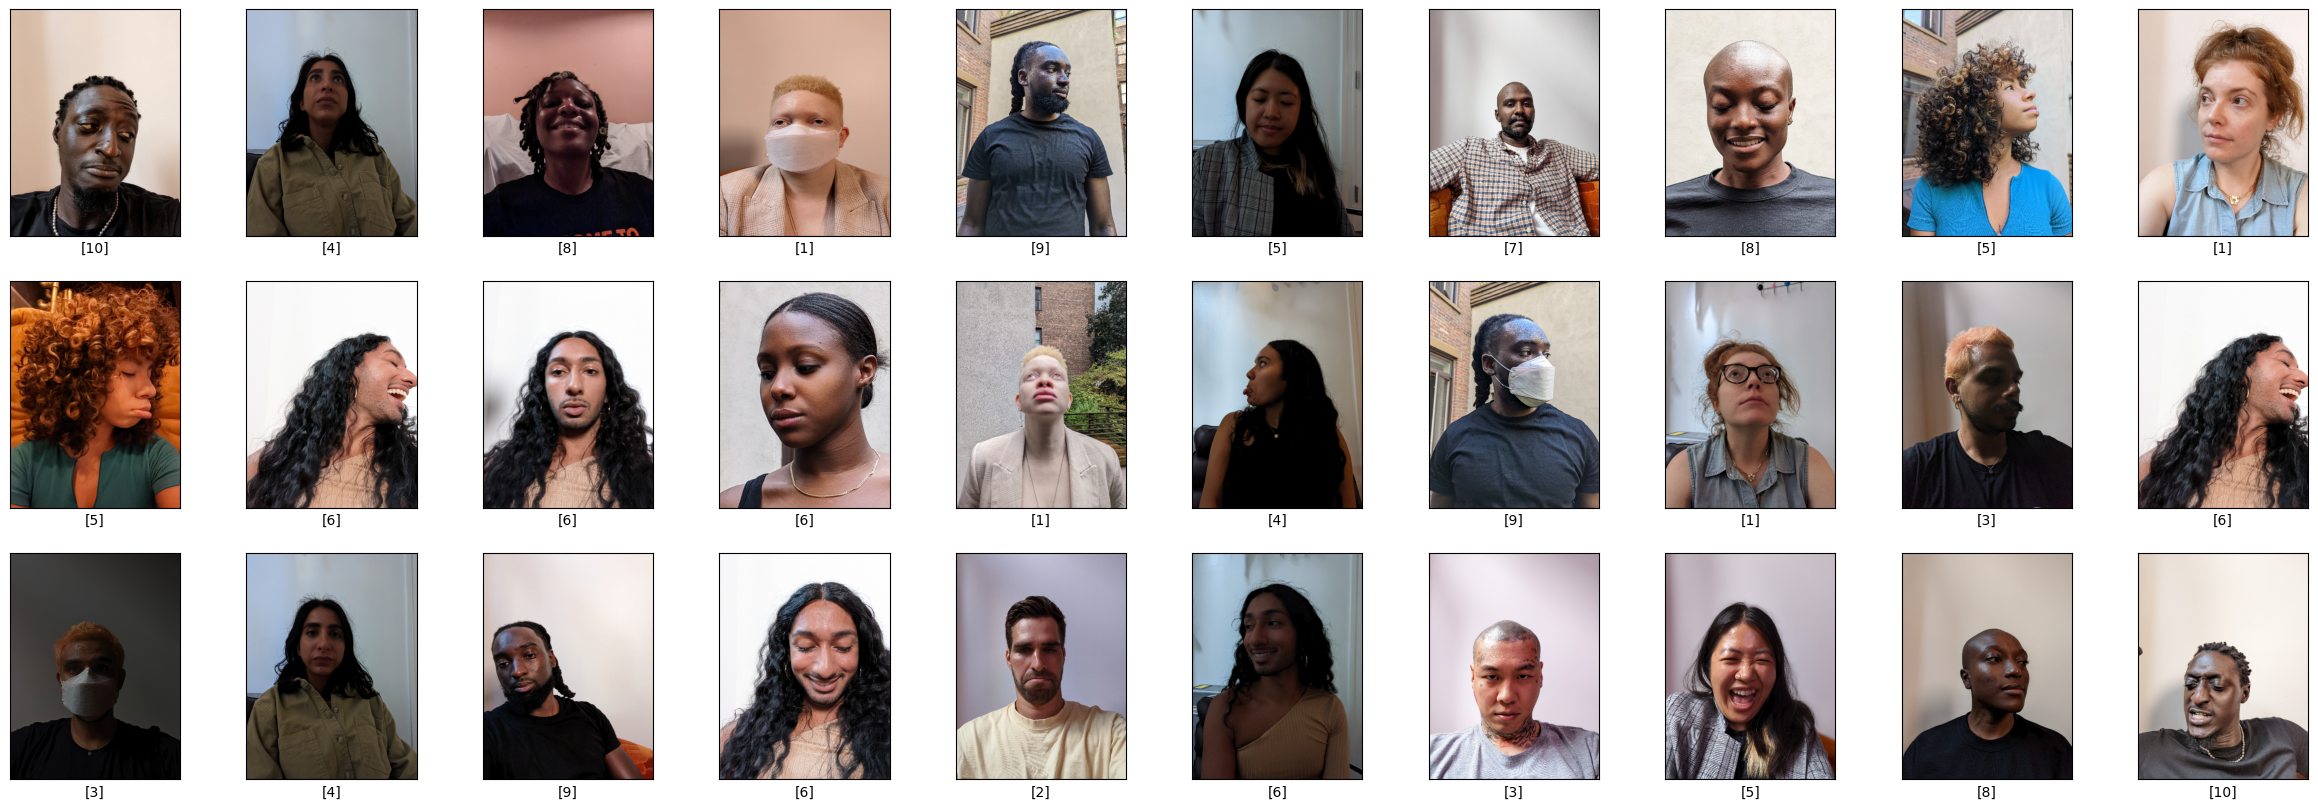

In [8]:
count = 0
idxs = [random.randint(0,1057) for i in range(30)]
plt.figure(figsize=(30, 10))
for idx in idxs:
    plt.subplot(3, 10, count+1)
    plt.imshow(X_train[idx])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[idx])
    count +=1
plt.show()

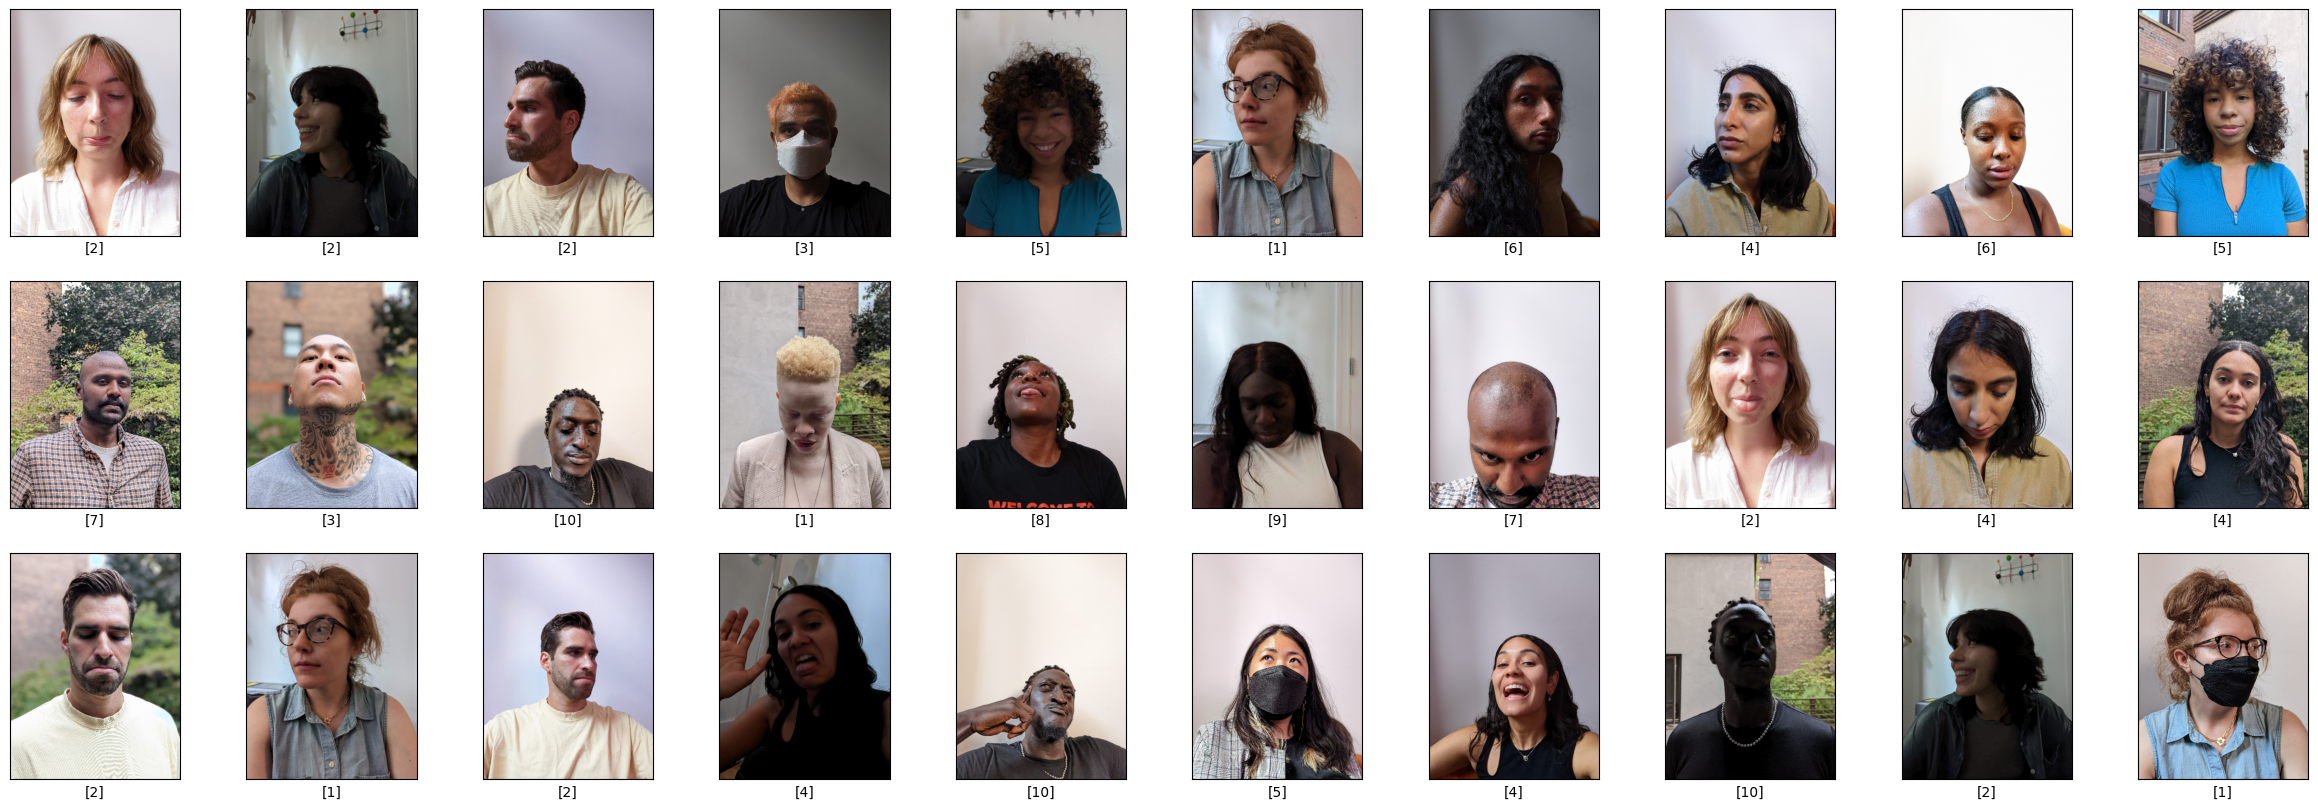

In [34]:
count = 0
idxs = [random.randint(0,453) for i in range(30)]
plt.figure(figsize=(30, 10))
for idx in idxs:
    plt.subplot(3, 10, count+1)
    plt.imshow(X_test[idx])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[idx])
    count +=1
plt.show()

In [35]:
input_shape = X_train[0].shape

In [36]:
output_unit = y_train.shape[-1]

In [37]:

model = tf.keras.Sequential([
    
    tf.keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    #layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=1024, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=2048, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),

    layers.Flatten(),
    
    layers.Dense(1024),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),


    layers.Dense(output_unit),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 152, 114, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 152, 114, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 152, 114, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 149, 111, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 149, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 74, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 72, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 72, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 72, 53, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 70, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 70, 51, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 35, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 35, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 33, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 33, 23, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 16, 11, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 11, 1024)   │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 16, 11, 1024)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 6, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 6, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │             

 Total params: 50,895,041 (194.15 MB)

 Trainable params: 50,883,841 (194.11 MB)

 Non-trainable params: 11,200 (43.75 KB)

In [38]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h = model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.1290 - loss: -20.2059 - val_accuracy: 0.1321 - val_loss: -1456.6351
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - accuracy: 0.1290 - loss: -51.7463 - val_accuracy: 0.1321 - val_loss: -1886.2783
Epoch 3/10
 3/27 ━━━━━━━━━━━━━━━━━━━━ 2:24 6s/step - accuracy: 0.1424 - loss: -74.6926